In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns

from yatry.utils.helpers.time import calc_time_conv_params, time_affinity_score

sns.set_theme()

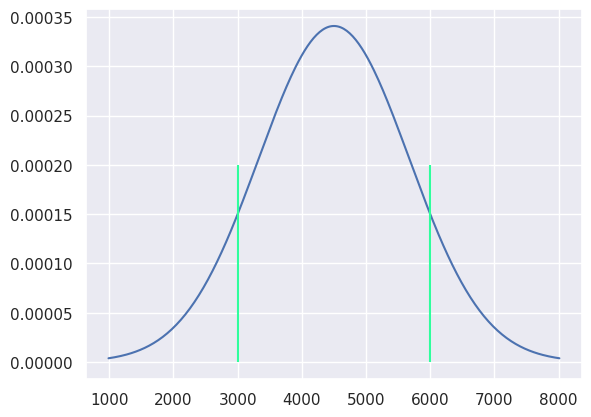

In [6]:
u1, std1 = calc_time_conv_params(t_min=3000, t_max=6000)
x = np.linspace(u1 - 3 * std1, u1 + 3 * std1, 300)
plt.plot(x, norm.pdf(x, u1, std1))
plt.vlines([3000, 6000], ymin=0, ymax=2e-4, colors="#2ffe9d")

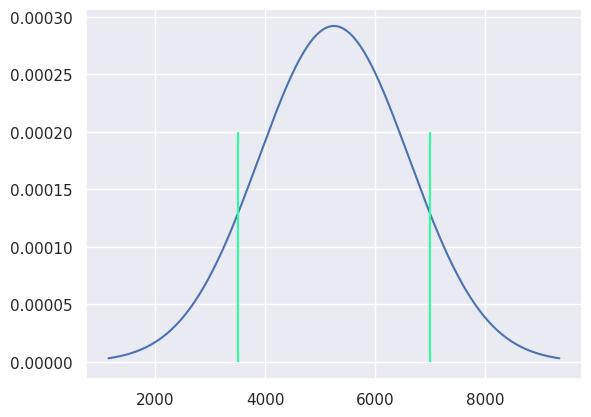

In [7]:
u2, std2 = calc_time_conv_params(t_min=3500, t_max=7000)
x = np.linspace(u2 - 3 * std2, u2 + 3 * std2, 300)
plt.plot(x, norm.pdf(x, u2, std2))
plt.vlines([3500, 7000], ymin=0, ymax=2e-4, colors="#2ffe9d")

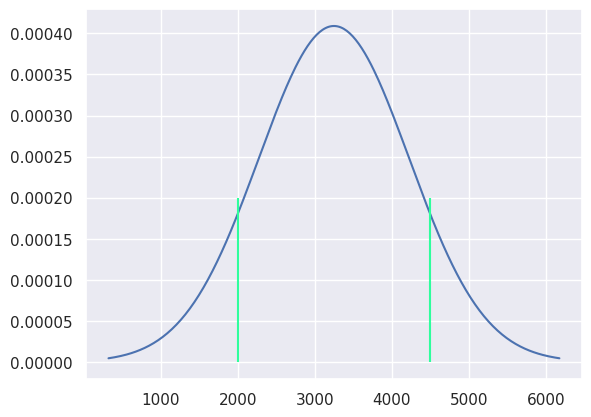

In [15]:
t_min, t_max = 2000, 4500

u3, std3 = calc_time_conv_params(t_min=t_min, t_max=t_max)
x = np.linspace(u3 - 3 * std3, u3 + 3 * std3, 300)
plt.plot(x, norm.pdf(x, u3, std3))
plt.vlines([t_min, t_max], ymin=0, ymax=2e-4, colors="#2ffe9d")

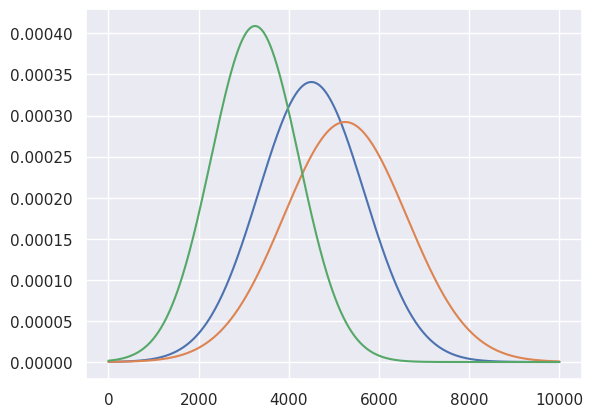

In [20]:
x = np.linspace(0, 10000, 500)
plt.plot(x, norm.pdf(x, u1, std1))
plt.plot(x, norm.pdf(x, u2, std2))
plt.plot(x, norm.pdf(x, u3, std3))

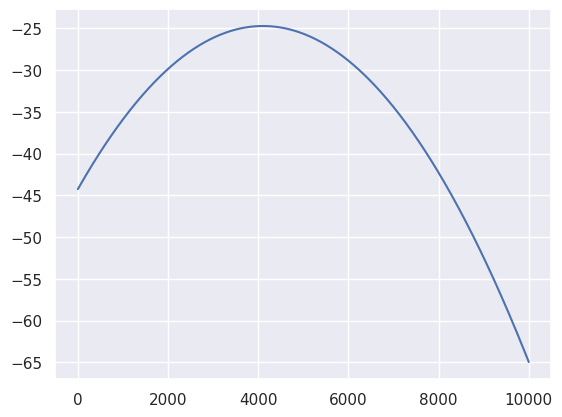

In [22]:
plt.plot(
    x, np.log(norm.pdf(x, u2, std2) * norm.pdf(x, u1, std1) * norm.pdf(x, u3, std3))
)

In [28]:
from scipy.optimize import golden


golden(
    func=(
        lambda x: -np.log(
            norm.pdf(x, u2, std2) * norm.pdf(x, u1, std1) * norm.pdf(x, u3, std3)
        )
    ),
    brack=(0, 10000),
)

np.float64(4106.582673268038)